In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


In [3]:
# Veri Yükleme
df = pd.read_csv("/Users/atakanemre/YapayZekaLab/Hafta-2/Uygulama-4/train.csv")

# Model İçin Girdi ve Çıktı Hazırlama
X = df.drop(columns=["price_range"])
y = df["price_range"]

# Veriyi Standartlaştırma
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Veriyi Eğitim ve Test İçin Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Çıktıyı Kategorik Hale Getirme
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:
# Yapay Sinir Ağı Modeli
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Modeli Eğitme
history = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=150, verbose=1)

Epoch 1/150


/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2736 - loss: 1.5598 - val_accuracy: 0.3200 - val_loss: 1.3620
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3554 - loss: 1.3449 - val_accuracy: 0.4025 - val_loss: 1.2738
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4332 - loss: 1.2590 - val_accuracy: 0.5000 - val_loss: 1.1760
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5188 - loss: 1.1492 - val_accuracy: 0.5600 - val_loss: 1.0428
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5908 - loss: 1.0175 - val_accuracy: 0.6125 - val_loss: 0.9080
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6429 - loss: 0.8929 - val_accuracy: 0.6625 - val_loss: 0.7963
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6880 - loss: 0.7829 - val_accuracy: 0.7400 - val_loss: 0.7052
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7290 - loss: 0.6971 - val_accuracy: 0.7725 - val_loss: 0.6

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # Modeli oluştur ve eğit
    model = Sequential()
    model.add(Dense(16, input_dim=X.shape[1], activation="relu"))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    model.fit(X_train_fold, to_categorical(y_train_fold), epochs=150, verbose=0)
    
    # Modeli değerlendir
    score = model.evaluate(X_val_fold, to_categorical(y_val_fold), verbose=0)[1]
    scores.append(score)

print(f"Çapraz doğrulama başarımları: {scores}")
print(f"Ortalama başarı: {np.mean(scores)}")

/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/atakanemre/.pyenv/versions/3.11.0/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

Çapraz doğrulama başarımları: [0.9474999904632568, 0.9375, 0.9024999737739563, 0.9175000190734863, 0.9325000047683716]
Ortalama başarı: 0.9274999976158143


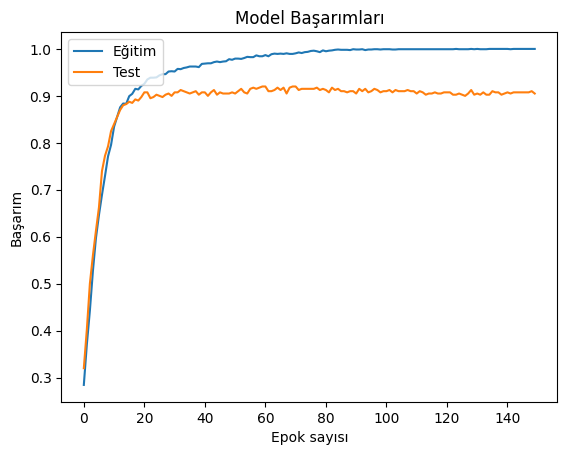

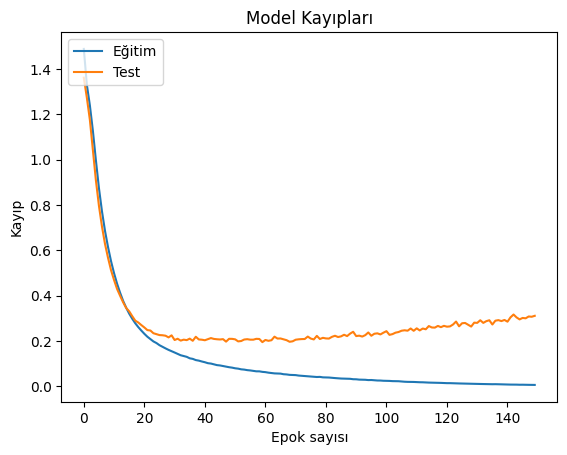

In [9]:
# Grafikler - Eğitim ve Doğrulama Başarımları
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


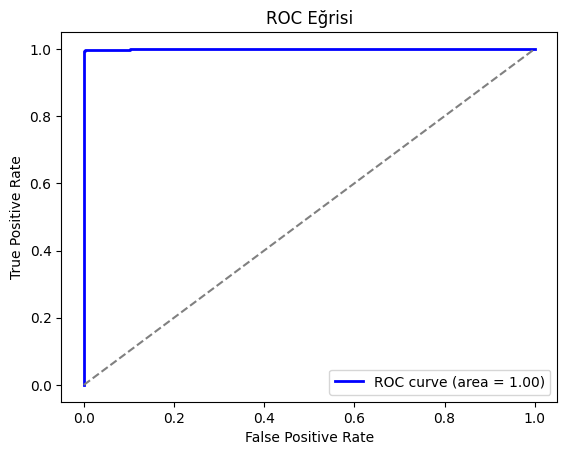

In [10]:
# ROC Eğrisi
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test_cat.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()